# Exploratory Analysis of Spotify

***Objective***

Our primary objective is to give recommendations for artists looking to break into the music industry. We hope to do this by illustrating the most important features when writing a song, highlighting other popular artists to emmulate, and giving genre specific recommendations.

**Data Dictionary**

| Feature Name | Definition | Key |
| ------------ | ---------- | --- |
| track_id | _The Spotify ID for the track_ | ... |
| artists | _Name of the Artists_ | ... | 
| album_name | _Album name_ | ... |
| track_name | _Track name_ | ... |
| popularity | _Popularity_ | ... |
| duration_ms | _The duration of the track in milliseconds._ | ... |
| explicit | _Explicit_ | __True, False__  |
| danceability | _Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity_ |__0.0 = least danceable,  1.0 = most danceable__  |
| energy | _Energy represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy_ | __0.0 to 1.0__ |
| key | _The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1_ | __>= -1  <= 11__ |
| loudness | _Loudness of the track_ | ... |
| mode | _Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived_ | __Major = 1 , Minor = 0__ |
| speechiness | _Speechiness detects the presence of spoken words in a track_ | ... |
| acousticness | _A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic_ | __>= 0    <= 1__ |
| instrumentalness | _Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context_ | ... |
| liveness | _Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live_ | ... |
| valence | _A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track_ | __>= 0  <= 1__|
| tempo | _The overall estimated tempo of a track in beats per minute (BPM)_ | ... |
| time_signature | _An estimated time signature_ | __>= 3     <= 7__ |
| track_genre | _Genre of the track_ | __Pop, country, rap, etc..__ |


Detailed information about the features are also available [here](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)


[Data Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?select=dataset.csv)

# **Overall Topics of Research:**



What variables have the most direct impact on popularity 

*   Correlation of Variables to Popularity
*   Which artist had the highest popularity based on their songs grouped by genre
How does the average duration of a song vary based on its genre


*   When comparing specific genres, how do the variable's significance change
*  What would we recommend to a new artist attempting to start in one of the genress below:

Indian Music

Pop Music

Country Music






# Dataset Overview*

In [ ]:
# importing requried python packages
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns

In [ ]:
# Reads the spotify data from a github repository and stores it in a dataframe.
data = 'https://raw.githubusercontent.com/Matt-Bevacq/DATA-6505/main/spotify%20project%20data.csv'


spotify_df = pd.read_csv(data, sep=',')


In [ ]:
# displays the first five rows of the spotify
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Dataset Exploration*

In [ ]:
# understanding the basic information of the data

def all_about_data(spotify_df):
    print("Some basic information about the data:\n")

    #shape of the dataframe
    print("Number of rows:",spotify_df.shape[0])
    print("Number of columns:",spotify_df.shape[1])

    #List column names
    print("\nColumn Names:")
    print(spotify_df.columns)

    #data types for each column in the dataframe
    print("\nDatatype of each columns:")
    print("Dataypes:",spotify_df.dtypes)

    #summary stats
    print("\nSummary Stats:")
    print(spotify_df.describe())

    #missing value inspection
    print("\nMissing Values:")
    print(spotify_df.isna().sum())

all_about_data(spotify_df)


Some basic information about the data:

Number of rows: 114000
Number of columns: 21

Column Names:
Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Datatype of each columns:
Dataypes: Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float6

In [ ]:
# displaying the columns
spotify_df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
#describing dataset
spot = spotify_df.describe()

spot.swapaxes("index", "columns")

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


# **Data Cleaning**

In [ ]:
#Checking null values
spotify_df[spotify_df["artists"].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [ ]:
#copying the spotify_df dataset
spotify_df_copy = spotify_df.copy()

In [ ]:
 #drop 3 null values
spotify_df = spotify_df.dropna()

In [ ]:
#drop the re-released songs by artists from different albums
spotify_df = spotify_df.drop_duplicates(subset = ['artists', 'track_name'], keep = 'first').reset_index(drop = True)

In [ ]:
#drop the unwanted columns
spotify_df.drop(['Unnamed: 0'], axis=1, inplace=True )

In [ ]:
#converting [duration_ms] into [duration_min]
spotify_df['duration_min'] = round((spotify_df['duration_ms'])/1000/60,2)

In [ ]:
#checking the shape of the dataset after cleaning the data
spotify_df.shape

(81341, 21)

In [ ]:
#checking for missing values after cleaning the data
spotify_df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
dtype: int64

In [ ]:
spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.84
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.49
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.51
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.37
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.31


# Exploratory questions 

**What variables have the most direct impact on popularity?**

When asking this question, our hypothesis was that there would be certain variables that would have a significant role in song popularity. What we found was that there is no significant variable that could dictate popularity when looking at all of the songs across genres. 

Text(0, 0.5, 'Popularity')

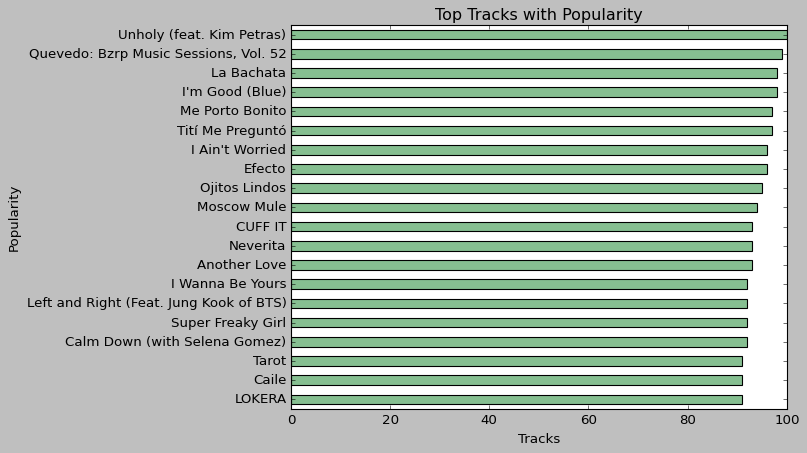

In [ ]:
poplr_top_tracks = spotify_df.groupby("track_name")['popularity'].mean().sort_values().tail(20)
poplr_top_tracks.plot.barh(color='#86bf91')
plt.title('Top Tracks with Popularity')
plt.xlabel('Tracks')
plt.ylabel('Popularity')

The most popular song is "Unholy (feat. Kim Petras)" with a popularity score of 100

**Which artist had the highest popularity based on their songs grouped by genre?**


Text(0, 0.5, 'Artists')

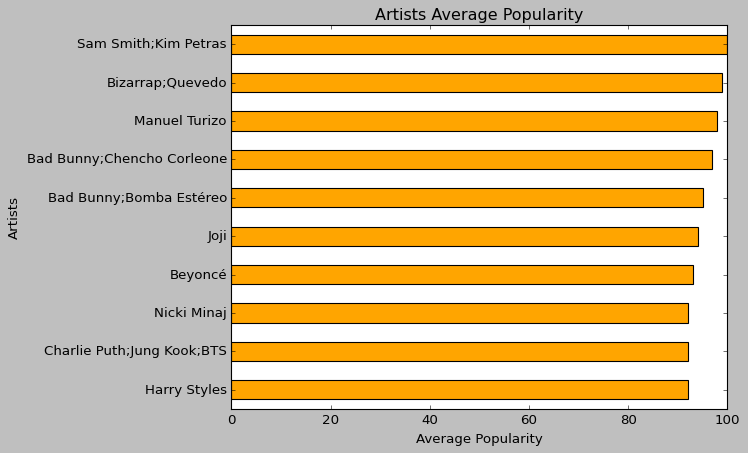

In [ ]:
artists_grp = spotify_df.groupby('artists')['popularity'].mean().sort_values().tail(10)
artists_grp.plot.barh(color='orange')
plt.title('Artists Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artists')


The artist with the highest popularity based on their songs Sam Smith and Kim Petras.

**How does the average duration of a song vary based on its genre?** 

Text(0, 0.5, 'Genre')

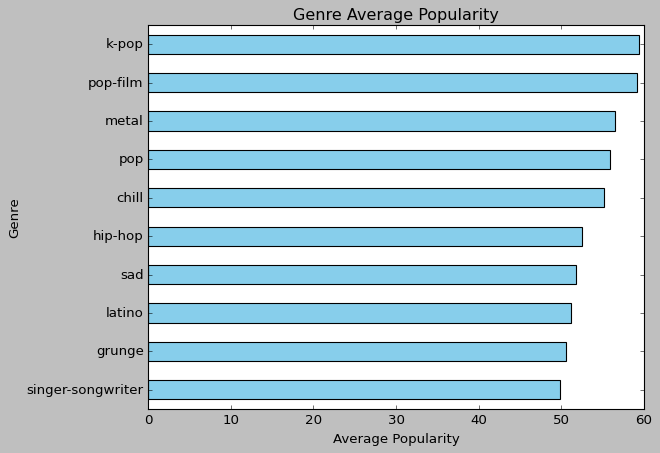

In [ ]:
#average duration of a song vary based on its genre


average_len_genre = spotify_df.groupby('track_genre')['popularity'].mean().sort_values().tail(10)
average_len_genre.plot.barh(color='skyblue')
plt.title('Genre Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')


# **Genre: Pop-music**

In [ ]:
# create subset with data that only has genre of pop
pop_df = spotify_df[spotify_df['track_genre']=='pop']


In [ ]:
# list of popular songs based on previously established subset sorted by popularity
pop_df.sort_values(by=['popularity'], ascending=False)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
61256,4LRPiXqCikLlN15c3yImP7,Harry Styles,As It Was,As It Was,95,167303,False,0.520,0.731,6,...,0,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,4,pop,2.79
61276,6xGruZOHLs39ZbVccQTuPZ,Joji,Glimpse of Us,Glimpse of Us,94,233456,False,0.440,0.317,8,...,1,0.0531,0.89100,0.000005,0.1410,0.2680,169.914,3,pop,3.89
61274,0WtM2NBVQNNJLh6scP13H8,Rema;Selena Gomez,Calm Down (with Selena Gomez),Calm Down (with Selena Gomez),92,239317,False,0.801,0.806,11,...,1,0.0381,0.38200,0.000669,0.1140,0.8020,106.999,4,pop,3.99
61238,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,After Hours,Blinding Lights,91,200040,False,0.514,0.730,1,...,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,4,pop,3.33
61242,58HvfVOeJY7lUuCqF0m3ly,Elley Duhé,MIDDLE OF THE NIGHT,MIDDLE OF THE NIGHT,90,184447,False,0.410,0.611,4,...,0,0.0467,0.02280,0.000000,0.1160,0.0899,185.727,3,pop,3.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61325,7xrLgNBENSWmiu6s8lYIQ8,Ed Sheeran,Feeling Good,Overpass Graffiti,0,236906,False,0.520,0.849,9,...,0,0.1860,0.00253,0.000000,0.1190,0.7740,175.908,4,pop,3.95
61497,1LATi1QmWT9eUWmrLi1Onk,Lana Del Rey,West Coast,Blue Banisters,0,293692,False,0.373,0.114,5,...,1,0.0410,0.93700,0.000047,0.1040,0.1720,90.945,1,pop,4.89
61349,1gMnyo0OUAL6HDJ39lyVwU,Justin Bieber,Autumn Vibes 2022,Hold On,0,170813,False,0.658,0.634,1,...,0,0.0413,0.01060,0.000000,0.1320,0.2900,139.980,4,pop,2.85
61277,0MnmtOOke4uQVBMAjIgwVZ,The Weeknd,Halloween Party 2022,After Hours,0,361946,False,0.651,0.567,5,...,0,0.0317,0.09340,0.009910,0.1240,0.1380,108.953,4,pop,6.03


In [ ]:
pop_df.groupby(by=['track_genre']).mean()[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','tempo', 'valence','duration_min']].sort_values(by='track_genre')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,valence,duration_min
track_genre,,,,,,,,,
pop,0.591652,0.593278,-6.950773,0.076444,0.383167,0.005925,119.950278,0.465706,3.662107


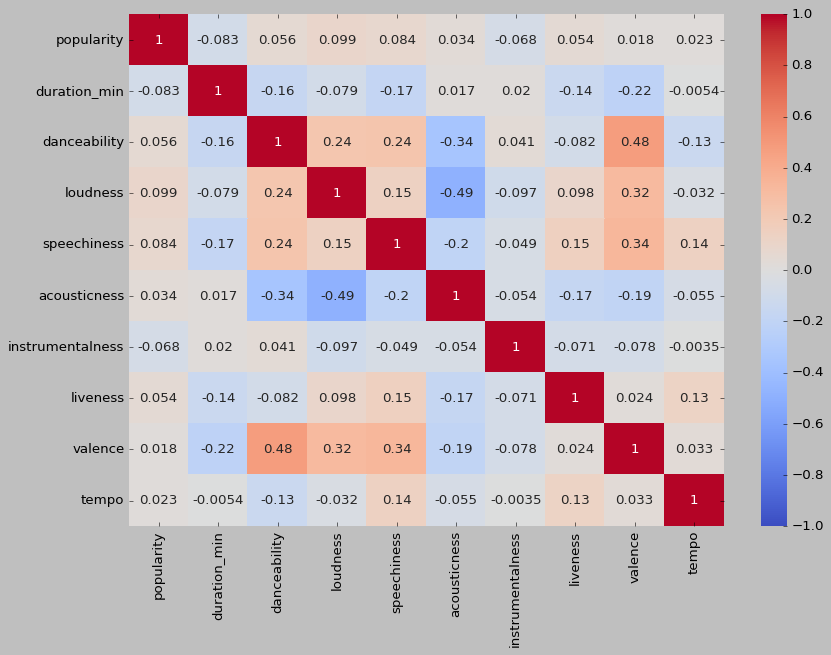

In [ ]:
pop_corr_c = pop_df[['popularity','duration_min','danceability','loudness','speechiness','acousticness', 'instrumentalness', 'liveness','valence','tempo' ]].corr()

#sns.set(style = 'darkgrid')


plt.figure(figsize=(12,8))
#sns.heatmap(corr, cmap='YlGnBu', annot=True)
sns.heatmap(pop_corr_c,
            vmin=-1, vmax=1, # set the color bar range to [-1, 1]
            cmap='coolwarm', # set the color scheme to 'coolwarm'
            annot=True) 


The three variables with the highest correlation to popularity for pop music are **loudness, speechiness, and key**

In [ ]:
# top 25 most popular pop songs
pop_t10 = pop_df.nlargest(n=25, columns=['popularity'])
pop_t10.groupby('artists').head(25)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
61256,4LRPiXqCikLlN15c3yImP7,Harry Styles,As It Was,As It Was,95,167303,False,0.520,0.731,6,...,0,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,4,pop,2.79
61276,6xGruZOHLs39ZbVccQTuPZ,Joji,Glimpse of Us,Glimpse of Us,94,233456,False,0.440,0.317,8,...,1,0.0531,0.89100,0.000005,0.1410,0.2680,169.914,3,pop,3.89
61274,0WtM2NBVQNNJLh6scP13H8,Rema;Selena Gomez,Calm Down (with Selena Gomez),Calm Down (with Selena Gomez),92,239317,False,0.801,0.806,11,...,1,0.0381,0.38200,0.000669,0.1140,0.8020,106.999,4,pop,3.99
61238,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,After Hours,Blinding Lights,91,200040,False,0.514,0.730,1,...,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,4,pop,3.33
61239,7MXVkk9YMctZqd1Srtv4MB,The Weeknd;Daft Punk,Starboy,Starboy,90,230453,True,0.679,0.587,7,...,1,0.2760,0.14100,0.000006,0.1370,0.4860,186.003,4,pop,3.84
61242,58HvfVOeJY7lUuCqF0m3ly,Elley Duhé,MIDDLE OF THE NIGHT,MIDDLE OF THE NIGHT,90,184447,False,0.410,0.611,4,...,0,0.0467,0.02280,0.000000,0.1160,0.0899,185.727,3,pop,3.07
61244,2eAvDnpXP5W0cVtiI0PUxV,Ruth B.,Safe Haven,Dandelions,90,233720,False,0.609,0.692,1,...,1,0.0259,0.01570,0.000000,0.0864,0.4540,116.959,3,pop,3.90
61255,0T5iIrXA4p5GsubkhuBIKV,Stephen Sanchez,Until I Found You,Until I Found You,90,177720,False,0.539,0.508,10,...,1,0.0288,0.72700,0.000000,0.1740,0.2270,101.358,3,pop,2.96
61275,1cKHdTo9u0ZymJdPGSh6nq,The Weeknd;Gesaffelstein,"My Dear Melancholy,",I Was Never There,90,241066,False,0.323,0.737,10,...,1,0.0338,0.14200,0.000162,0.1630,0.1550,113.260,4,pop,4.02
61257,0u2P5u6lvoDfwTYjAADbn4,Billie Eilish;Khalid,lovely (with Khalid),lovely (with Khalid),89,200185,False,0.351,0.296,4,...,0,0.0333,0.93400,0.000000,0.0950,0.1200,115.284,4,pop,3.34


In [ ]:
# bottom 25 most popular pop songs
pop_b10 = pop_df.nsmallest(n=25, columns=['popularity'])
pop_b10.groupby('artists').head(25)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
61269,6X7pjnNm5dHSUot6hp3KFU,Taylor Swift,Autumn Vibes 2022,Lover,0,221306,False,0.359,0.543,7,...,1,0.0915,0.49200,0.000016,0.1180,0.453,68.505,4,pop,3.69
61271,3AYtDDIbG4DQxnEFELeFag,Taylor Swift,Autumn Vibes 2022,willow,0,214706,False,0.392,0.579,7,...,1,0.1640,0.83500,0.001790,0.1450,0.549,80.961,4,pop,3.58
61272,14MGlCeQzAJj3EeznSGeEC,Taylor Swift,Autumn Vibes 2022,cardigan,0,239560,False,0.612,0.580,0,...,0,0.0419,0.52500,0.000414,0.2600,0.534,130.045,4,pop,3.99
61277,0MnmtOOke4uQVBMAjIgwVZ,The Weeknd,Halloween Party 2022,After Hours,0,361946,False,0.651,0.567,5,...,0,0.0317,0.09340,0.009910,0.1240,0.138,108.953,4,pop,6.03
61286,3HoQtJWvaadVDZPgQevKIh,The Weeknd,Autumn Vibes 2022,Take My Breath - Single Version,0,220196,False,0.747,0.739,8,...,1,0.0487,0.01060,0.000022,0.1010,0.523,120.996,4,pop,3.67
61315,3CzEMZd3QhEFlvWIayxvm9,Ed Sheeran;Lil Baby,Totally Rap,2step,0,163449,False,0.693,0.643,4,...,0,0.0828,0.13800,0.000000,0.1080,0.477,95.055,4,pop,2.72
61321,7s2OAgMDtuwq8F3DaBhunU,Ed Sheeran,Music for Rainy Days,Autumn Leaves,0,200755,False,0.555,0.257,10,...,1,0.0299,0.89200,0.000001,0.1240,0.431,89.013,4,pop,3.35
61322,1euRAecw6xEwkt6lPXMbFP,Ed Sheeran,Today's Party Hits,Shivers,0,207853,False,0.788,0.859,2,...,1,0.0856,0.28100,0.000000,0.0424,0.822,141.020,4,pop,3.46
61323,4JWlQ6skcm0SuztTiapWeo,Ed Sheeran,Coffee Moment,How Would You Feel (Paean),0,280533,False,0.618,0.439,9,...,1,0.0269,0.42400,0.000000,0.1270,0.242,139.983,4,pop,4.68
61324,0MbP1Nr6DLXB7HFXD7QVwU,Ed Sheeran,20's Rock,Visiting Hours,0,215506,False,0.471,0.396,8,...,1,0.0336,0.77000,0.000000,0.0729,0.263,149.609,4,pop,3.59


Text(0, 0.5, 'Artists')

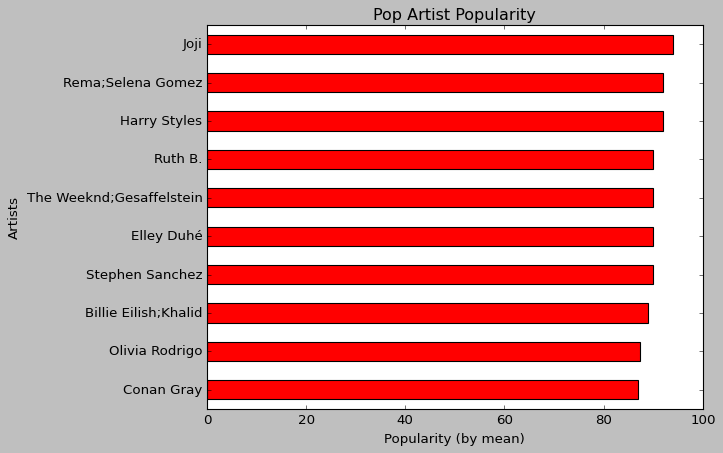

In [ ]:
popular_pop_artists_mean = pop_df.groupby(by=['artists'])['popularity'].mean().sort_values().tail(10)
popular_pop_artists_mean.plot.barh(color='red')
plt.title('Pop Artist Popularity')
plt.xlabel('Popularity (by mean)')
plt.ylabel('Artists')

The artists with the highest song popularity are **Joji, Harry Style**, and colab work between **Rema and Selena Gomez**

In [ ]:
pop_df.groupby(by=['track_genre','artists']).mean()[['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','tempo', 'valence','duration_min']].sort_values(by='popularity').tail(3)

popularity  danceability  energy  loudness  \
track_genre artists                                                         
pop         Harry Styles             92.0         0.534  0.7735   -4.7735   
            Rema;Selena Gomez        92.0         0.801  0.8060   -5.2060   
            Joji                     94.0         0.440  0.3170   -9.2580   

                               speechiness  acousticness  instrumentalness  \
track_genre artists                                                          
pop         Harry Styles            0.0511         0.232          0.000505   
            Rema;Selena Gomez       0.0381         0.382          0.000669   
            Joji                    0.0531         0.891          0.000005   

                                 tempo  valence  duration_min  
track_genre artists                                            
pop         Harry Styles       134.660   0.6095         2.845  
            Rema;Selena Gomez  106.999   0.8020         3.990  
            Joji               169.914   0.2680         3.890

Average **loudness is -6.4125**, with average of **speechiness being .0474**. The numbers of the top artists seems to indicate that there is even *further divide within the genre of pop* with what people tend to respond to, due the the large differences in variables such as valence, energy and accousticness. Pop artists like Harry Styles the work with Rema and Selena Gomez work well with concert settings due to their energy, while Joji focusing more on acousticness might indicate 

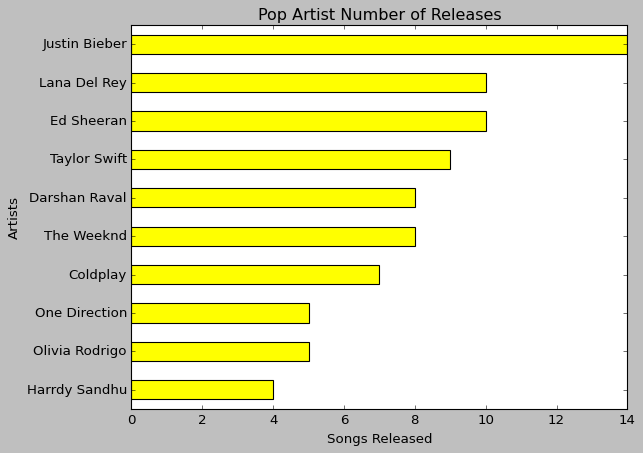

In [ ]:
pop_releases = pop_t10['artists'].unique()

#top 10 country artists with most releases
pop_art_releases = pop_df['artists'].value_counts().sort_values().tail(10)
pop_art_releases

pop_art_releases.plot.barh(color='yellow')
plt.title('Pop Artist Number of Releases')
plt.xlabel('Songs Released')
plt.ylabel('Artists')
plt.show()

In [ ]:
popular_pop_track = pop_df.groupby(by=['track_name'])['popularity'].mean().sort_values().tail(10)
popular_pop_track

track_name
Watermelon Sugar                 89.0
Dandelions                       90.0
I Was Never There                90.0
Until I Found You                90.0
Starboy                          90.0
MIDDLE OF THE NIGHT              90.0
Blinding Lights                  91.0
Calm Down (with Selena Gomez)    92.0
Glimpse of Us                    94.0
As It Was                        95.0
Name: popularity, dtype: float64

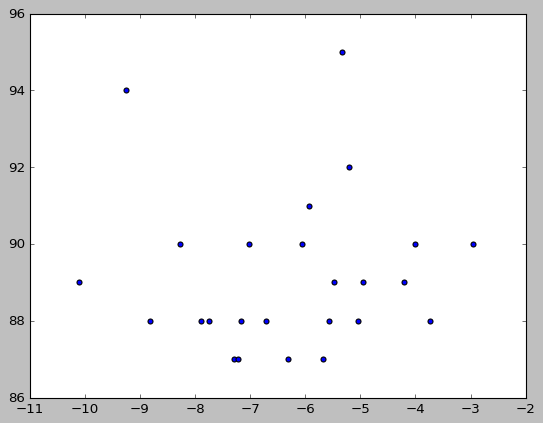

In [ ]:
plt.scatter(x = pop_t10['loudness'], y = pop_t10['popularity'])

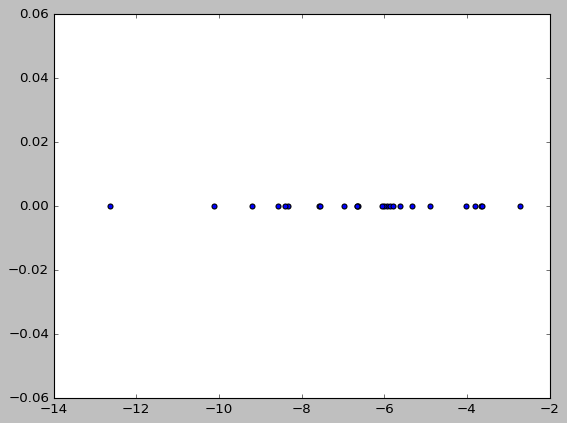

In [ ]:
plt.scatter(x = pop_b10['loudness'], y = pop_b10['popularity'])

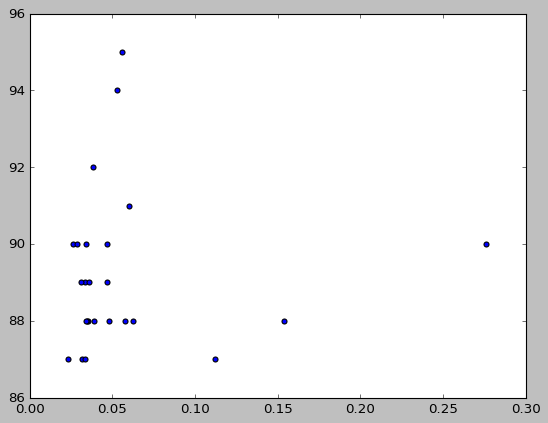

In [ ]:
plt.scatter(x = pop_t10['speechiness'], y = pop_t10['popularity'])

In [ ]:
import pandas as pd
data = [['duration_min',3.800466491228071, 3.67792, 3.05, 4.12], 
        ['danceability',0.5668000657894738, 0.630441, 0.541, 0.727],
        ['energy',0.6413827583964912, 0.6064369999999999, 0.488, 0.72725],       
        ['key', 5.309140350877193, 5.412, 2.0, 8.0],
        ['loudness', -8.258960368421052, -6.953969, -8.600000000000001, -5.1345],
        ['mode', 0.6375526315789474, 0.509, 0.0, 1.0],
        ['speechiness', 0.08465211228070177, 0.0799752, 0.0358, 0.0828],
        ['acousticness', 0.3149100624799999, 0.34369250999999995, 0.08305, 0.57575],
        ['instrumentalness',0.15604958922122808, 0.009026303910000002, 0.0, 2.5125e-05],
        ['liveness', 0.21355283605263162, 0.15825579999999997, 0.09332499999999999, 0.183],
        ['valence', 0.4740682309736842, 0.5062227, 0.344, 0.67825],
        ['tempo', 122.14783728947369, 120.92707300000001, 94.999, 144.02775]]

pop_rec = pd.DataFrame(data, columns = ["Variable", "Average_All_Music", "Average_Pop", "Average_Top_percentile_Pop", "Average_Bottom_percentile_Pop"])
pop_rec

,Variable,Average_All_Music,Average_Pop,Average_Top_percentile_Pop,Average_Bottom_percentile_Pop
0,duration_min,3.800466,3.677920,3.050000,4.120000
1,danceability,0.566800,0.630441,0.541000,0.727000
2,energy,0.641383,0.606437,0.488000,0.727250
3,key,5.309140,5.412000,2.000000,8.000000
4,loudness,-8.258960,-6.953969,-8.600000,-5.134500
5,mode,0.637553,0.509000,0.000000,1.000000
6,speechiness,0.084652,0.079975,0.035800,0.082800
7,acousticness,0.314910,0.343693,0.083050,0.575750
8,instrumentalness,0.156050,0.009026,0.000000,0.000025
9,liveness,0.213553,0.158256,0.093325,0.183000


Text(0.5, 1.0, 'Danceability pop top 25 songs')

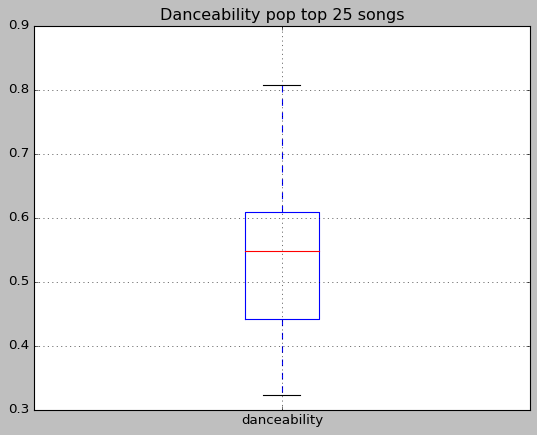

In [ ]:
df=pop_t10
boxplot = df.boxplot(column=['danceability'])  
plt.title('Danceability pop top 25 songs')

Text(0.5, 1.0, 'Loudness pop top 25 songs')

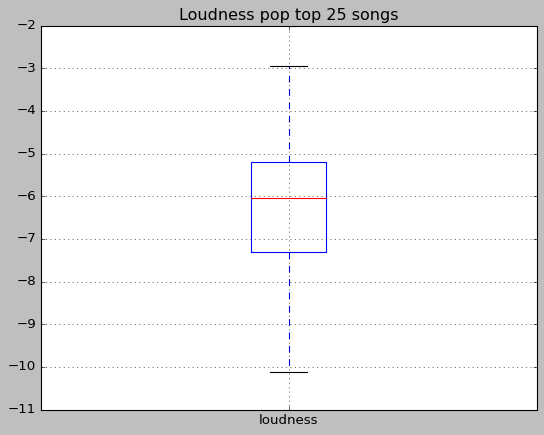

In [ ]:
df=pop_t10
boxplot = df.boxplot(column=['loudness'])  
plt.title('Loudness pop top 25 songs')

Loudness remains on the lower side, with the top 25 songs being **slightly higher** than the top 25th percentile. This could mean that the loudness for a song would be a more ideal **sweet spot around -7.0**

Text(0.5, 1.0, 'Speechiness pop top 25 songs')

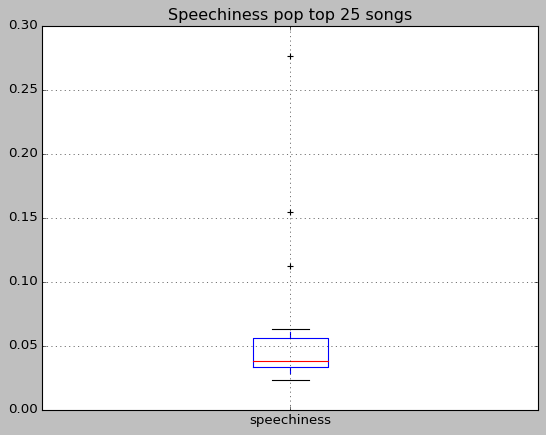

In [ ]:
df=pop_t10
boxplot = df.boxplot(column=['speechiness'])  
plt.title('Speechiness pop top 25 songs')

# Genre: Indian music

**Indian genre in Spotify can be defined as a genre of music that originates from India. It includes a variety of styles and influences, including Indian classical music, Bollywood film music, Indi-pop, folk, and contemporary music. It may also include elements of rock, jazz, reggae, and hip hop.**
 


In [ ]:
# create subset with data that only has genre of pop
ind_df = spotify_df[spotify_df['track_genre'] == 'indian']


In [ ]:
# list of popular songs based on previously established subset sorted by popularity
ind_df.sort_values(by=['popularity'], ascending=False)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
43672,6VBhH7CyP56BXjp8VsDFPZ,Pritam;Arijit Singh;Amitabh Bhattacharya,"Kesariya (From ""Brahmastra"")","Kesariya (From ""Brahmastra"")",88,268164,False,0.577,0.574,0,...,1,0.0278,0.572,0.000000,0.1000,0.4360,94.009,4,indian,4.47
43676,0IGXY47K2ha3AHfX57wY1O,Pritam;Arijit Singh;Amitabh Bhattacharya;Jonit...,"Deva Deva (From ""Brahmastra"")","Deva Deva (From ""Brahmastra"")",79,279107,False,0.534,0.721,0,...,1,0.0427,0.634,0.000877,0.1000,0.4390,112.062,4,indian,4.65
43699,72zHuDxFQTjbL51qJQSA7j,Jasleen Royal;B Praak;Romy;Anvita Dutt,"Ranjha (From ""Shershaah"")","Ranjha (From ""Shershaah"")",77,228855,False,0.603,0.573,1,...,1,0.0502,0.478,0.000000,0.0971,0.2360,82.941,4,indian,3.81
43684,5iCY0TXNImK4hyKfcplQsg,Anuv Jain,Baarishein,Baarishein,76,207309,False,0.475,0.124,2,...,1,0.0444,0.926,0.000000,0.0972,0.1900,94.420,4,indian,3.46
43685,0DXfJ2iKRDEG7rPgssWFea,Kanishk Seth;Kavita Seth,"Rangisari (From ""Jugjugg Jeeyo"")","Rangisari (From ""Jugjugg Jeeyo"")",75,223271,False,0.524,0.758,10,...,1,0.0538,0.270,0.130000,0.1060,0.3190,140.012,4,indian,3.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44159,5ksNp0jX87yHDKNfcj6Gun,Swattrex;Jordan Muzik,Yaad,Yaad,0,165279,False,0.764,0.696,0,...,1,0.3140,0.209,0.000000,0.1380,0.6300,130.018,4,indian,2.75
44161,460N6QN0SM6MMQvjXWPM1B,Swattrex;Lofi By Swattrex;Tracer,Jungle,Jungle,0,198423,False,0.729,0.339,5,...,1,0.1290,0.298,0.000049,0.1130,0.3750,87.983,4,indian,3.31
44165,0BXzHqVTlb88KmbgM56H70,Swattrex;Lofi By Swattrex,Sweater Weather,Sweater Weather,0,305117,False,0.464,0.397,1,...,1,0.0468,0.208,0.865000,0.1120,0.0541,96.035,4,indian,5.09
44147,2PyOIDf1OSOQR3hG12dtA2,Swattrex;YOUNG AND BROKE;Lofi By Swattrex,Maribou,Maribou,0,148545,False,0.485,0.423,10,...,0,0.2070,0.717,0.883000,0.0909,0.1450,97.814,4,indian,2.48


In [ ]:
ind_df.groupby(by=['track_genre']).mean()[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','tempo', 'valence','duration_min']].sort_values(by='track_genre')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,valence,duration_min
track_genre,,,,,,,,,
indian,0.585831,0.552712,-9.082978,0.068464,0.512171,0.037619,115.234548,0.447533,3.993878


In [ ]:
ind_corr = ind_df[['popularity','duration_min','danceability','loudness','speechiness','acousticness', 'instrumentalness', 'liveness','valence','tempo' ]].corr()


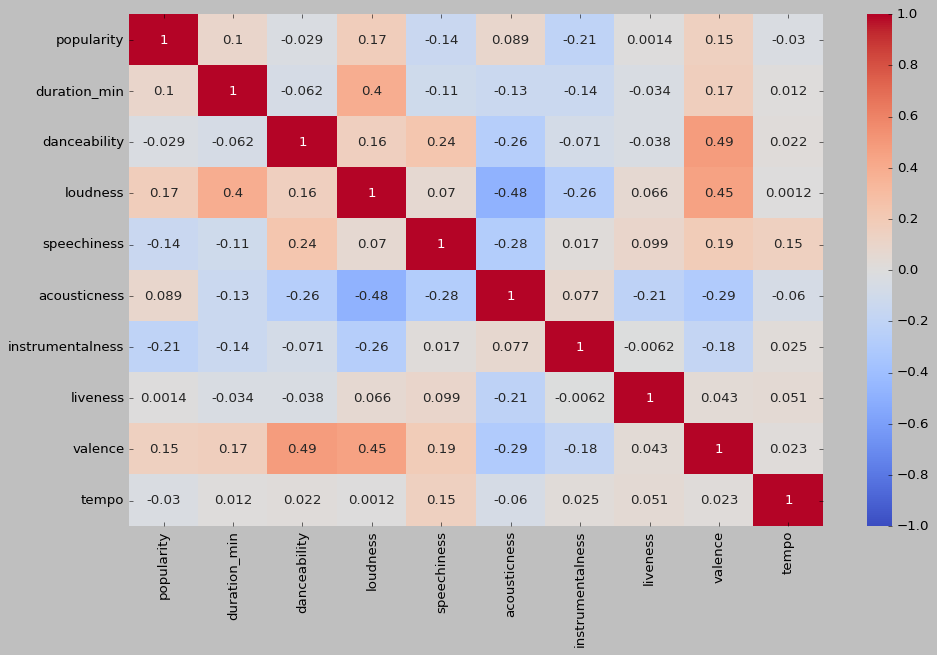

In [ ]:
ind_corr=ind_df[['popularity','duration_min','danceability','loudness','speechiness','acousticness', 'instrumentalness', 'liveness','valence','tempo']].corr()
plt.figure(figsize=(14,8))

sns.heatmap(ind_corr,
            vmin=-1, vmax=1, # set the color bar range to [-1, 1]
            cmap='coolwarm', # set the color scheme to 'coolwarm'
            annot=True) 

The variables with the highest correlation to popularity for indian music are **danceability, loudness and valence.**

In [ ]:
ind_df.groupby(by=['track_genre','artists']).mean()[['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','tempo', 'valence','duration_min']].sort_values(by='popularity').tail(3)

popularity  \
track_genre artists                                                          
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...        70.5   
            Pritam;Sreeram;Shilpa Rao                                 72.0   
            Pritam;Tochi Raina;Rekha Bhardwaj                         74.0   

                                                                danceability  \
track_genre artists                                                            
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...        0.5365   
            Pritam;Sreeram;Shilpa Rao                                 0.3020   
            Pritam;Tochi Raina;Rekha Bhardwaj                         0.5900   

                                                                energy  \
track_genre artists                                                      
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...   0.725   
            Pritam;Sreeram;Shilpa Rao                            0.493   
            Pritam;Tochi Raina;Rekha Bhardwaj                    0.555   

                                                                loudness  \
track_genre artists                                                        
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...    -7.612   
            Pritam;Sreeram;Shilpa Rao                             -5.038   
            Pritam;Tochi Raina;Rekha Bhardwaj                     -6.861   

                                                                speechiness  \
track_genre artists                                                           
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...      0.04195   
            Pritam;Sreeram;Shilpa Rao                               0.04510   
            Pritam;Tochi Raina;Rekha Bhardwaj                       0.02710   

                                                                acousticness  \
track_genre artists                                                            
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...        0.6305   
            Pritam;Sreeram;Shilpa Rao                                 0.4550   
            Pritam;Tochi Raina;Rekha Bhardwaj                         0.4810   

                                                                instrumentalness  \
track_genre artists                                                                
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...          0.000909   
            Pritam;Sreeram;Shilpa Rao                                   0.000000   
            Pritam;Tochi Raina;Rekha Bhardwaj                           0.000000   

                                                                  tempo  \
track_genre artists                                                       
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...  112.068   
            Pritam;Sreeram;Shilpa Rao                            88.904   
            Pritam;Tochi Raina;Rekha Bhardwaj                    84.027   

                                                                valence  \
track_genre artists                                                       
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...    0.437   
            Pritam;Sreeram;Shilpa Rao                             0.457   
            Pritam;Tochi Raina;Rekha Bhardwaj                     0.191   

                                                                duration_min  
track_genre artists                                                           
indian      Pritam;Arijit Singh;Amitabh Bhattacharya;Jonita...          4.65  
            Pritam;Sreeram;Shilpa Rao                                   4.16  
            Pritam;Tochi Raina;Rekha Bhardwaj                           3.72

In [ ]:
# top 10 most popular Indian songs
ind_top10 = ind_df.nlargest(n=10, columns=['popularity'])
ind_top10.groupby('artists').head(10)

In [ ]:
# bottom 10 most popular Indian songs
ind_bottom10 = ind_df.nsmallest(n=10, columns=['popularity'])
ind_bottom10.groupby('artists').head(10)

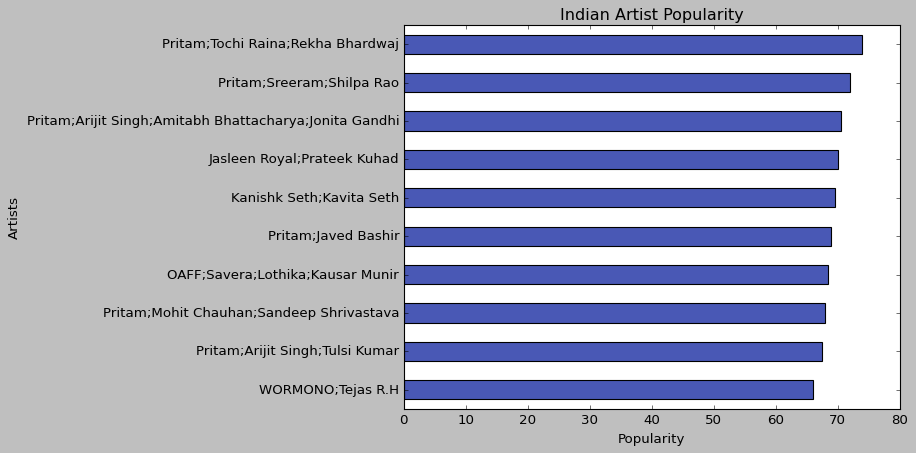

In [ ]:
popular_indian_artists_avg = ind_df.groupby(by=['artists'])['popularity'].mean().sort_values().tail(10)
popular_indian_artists_avg.plot.barh(color='#4958B5')
plt.title('Indian Artist Popularity')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

The artist with the highest song popularity are **Pritam, Tochi Raina and Rekha Bhardwaj**.

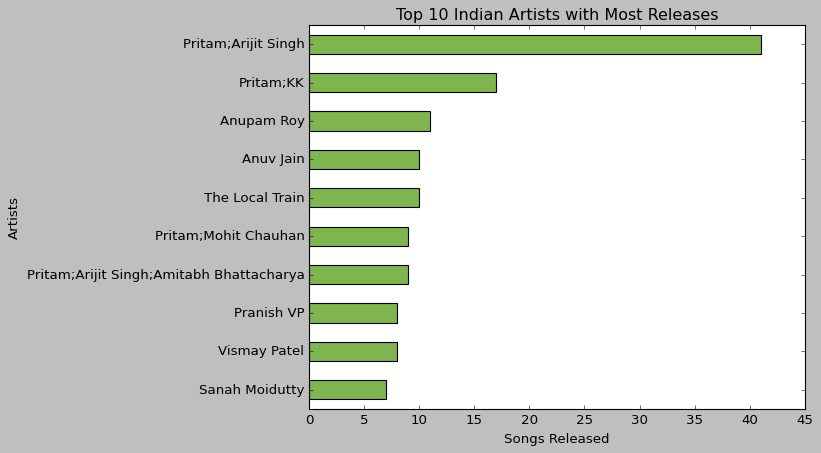

In [ ]:
Indian_releases = ind_top10['artists'].unique()

#top 10 Indian artists with most releases
Indian_art_releases = ind_df['artists'].value_counts().sort_values().tail(10)
Indian_art_releases

Indian_art_releases.plot.barh(color='#7eb54e')
plt.title('Top 10 Indian Artists with Most Releases')
plt.xlabel('Songs Released')
plt.ylabel('Artists')
plt.show()

The artist with most releases are  **Pritam and Arijit Singh**

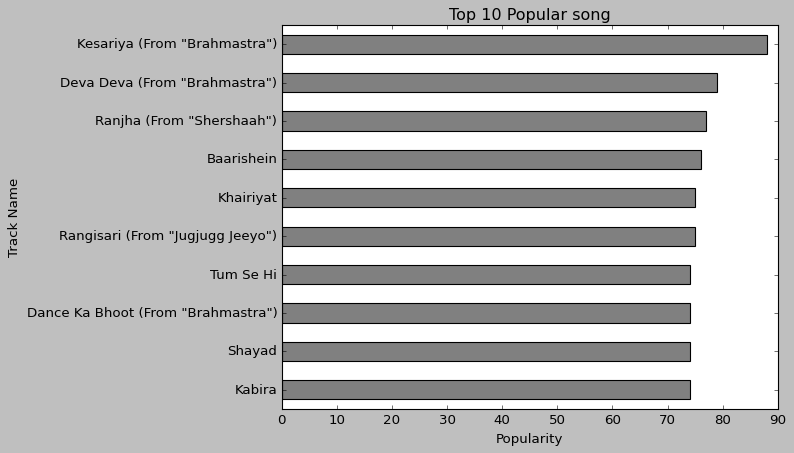

In [ ]:
#popular_indian_track = ind_df.groupby(by=['track_name'])['popularity'].mean().sort_values(ascending=False)[0:10]
#popular_indian_track

#top 10 popular song
popular_indian_track = ind_df.groupby(by=['track_name'])['popularity'].mean().sort_values().tail(10)
popular_indian_track
popular_indian_track.plot.barh(color='grey')
plt.title('Top 10 Popular song')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()


The most popular track is **Kesariya** from Brahmastra movie.

In [ ]:
import pandas as pd
data = [['duration_min',3.8568536162574842, 3.99387811634349, 3.2925,4.72], 
        ['danceability',0.5592777344758486, 0.585831024930748, 0.5539200000000001, 0.60748],
        ['energy',0.6350271440478972, 0.5527119113573408, 0.387, 0.736],
        ['key', 5.285870594165304, 5.090027700831025, 2.0, 8.0],
        ['loudness',-8.593813501186363, -9.08297783933518, -11.370000000000001, -6.10475],
        ['mode', 0.6323502292816661, 0.7049861495844876, 0.0, 1.0],
        ['speechiness', 0.08899362314208088, 0.06846371191135735, 0.0329, 0.06955],
        ['acousticness',0.32965414389914066, 0.5121708504155125, 0.259, 0.7817500000000001],
        ['instrumentalness',0.18473764623437136, 0.03761883072022161, 0.0, 0.00149],
        ['liveness', 0.21972076210029384, 0.1747862880886427, 0.09895, 0.20075],
        ['valence', 0.4632721169029148, 0.44753337950138505, 0.2795, 0.61225],
        ['tempo', 122.14545063375171, 115.2345484764543, 90.83075, 132.00549999999998]]

ind_rec = pd.DataFrame(data, columns = ["Variable", "Average_All_Music", "Average_Indian", "Indian_Music_Quartile_1", "Indian_Music_Quartile_3"])
ind_rec

,Variable,Average_All_Music,Average_Indian,Indian_Music_Quartile_1,Indian_Music_Quartile_3
0,duration_min,3.856854,3.993878,3.29250,4.72000
1,danceability,0.559278,0.585831,0.55392,0.60748
2,energy,0.635027,0.552712,0.38700,0.73600
3,key,5.285871,5.090028,2.00000,8.00000
4,loudness,-8.593814,-9.082978,-11.37000,-6.10475
5,mode,0.632350,0.704986,0.00000,1.00000
6,speechiness,0.088994,0.068464,0.03290,0.06955
7,acousticness,0.329654,0.512171,0.25900,0.78175
8,instrumentalness,0.184738,0.037619,0.00000,0.00149
9,liveness,0.219721,0.174786,0.09895,0.20075


Text(0.5, 1.0, 'Danceability of top 10 Indian songs')

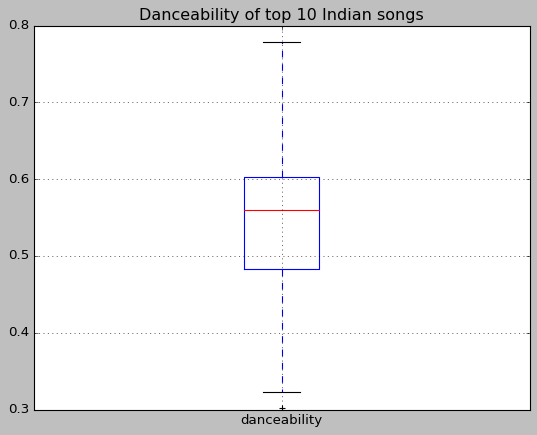

In [ ]:
df=ind_top10
boxplot = df.boxplot(column=['danceability'])  
plt.title('Danceability of top 10 Indian songs')

Text(0.5, 1.0, 'valence of top 10 Indian songs')

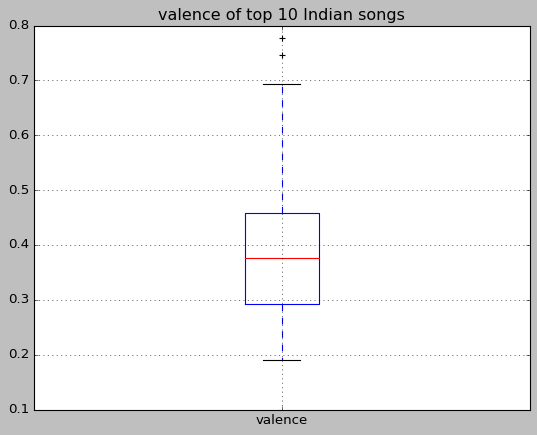

In [ ]:
df=ind_top10
boxplot = df.boxplot(column=['valence'])  
plt.title('valence of top 10 Indian songs')

Text(0.5, 1.0, 'Loudness of top 10 Indian songs')

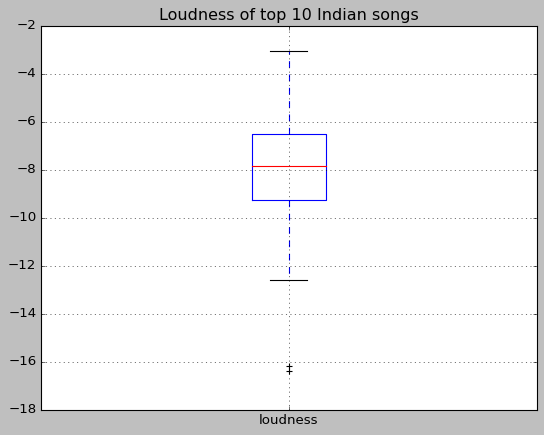

In [ ]:
df=ind_top10
boxplot = df.boxplot(column=['loudness'])  
plt.title('Loudness of top 10 Indian songs')

#Genre: Country music

In [ ]:
# create subset with data that only has genre of country
country_df = spotify_df[spotify_df['track_genre']=='country']

In [ ]:
#version 2 (b)
# list of popular songs based on previously established subset sorted by popularity
country_df.sort_values(by=['popularity'], ascending=False).head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
16903,5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,You Proof,86,157477,False,0.731,0.850,9,...,1,0.0336,0.25200,0.000000,0.6050,0.644,119.706,4,country,2.62
17042,4686eQ81DEswHa90bcdlC9,Bailey Zimmerman,Rock and A Hard Place,Rock and A Hard Place,84,207540,False,0.582,0.568,1,...,1,0.0275,0.57700,0.000000,0.1050,0.394,121.991,3,country,3.46
16631,40riOy7x9W7GXjyGp4pjAv,Eagles,Hotel California (2013 Remaster),Hotel California - 2013 Remaster,84,391376,False,0.579,0.508,2,...,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,4,country,6.52
16940,3cBsEDNhFI9E82vPj3kvi3,Morgan Wallen,Dangerous: The Double Album,Wasted On You,83,178520,False,0.505,0.657,11,...,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,3,country,2.98
16912,200x8ONbPfFzByUr3fVz46,Cole Swindell,Stereotype,She Had Me At Heads Carolina,82,206106,False,0.607,0.912,8,...,1,0.0611,0.12400,0.000000,0.3320,0.722,134.944,4,country,3.44
16945,28n8z9IQKyjMPxmvYMBqZa,Luke Combs,The Kind of Love We Make,The Kind of Love We Make,82,224426,False,0.608,0.745,1,...,1,0.0277,0.02260,0.000006,0.0942,0.464,102.025,4,country,3.74
16839,3fqwjXwUGN6vbzIwvyFMhx,Chris Stapleton,Traveller,Tennessee Whiskey,81,293293,False,0.392,0.370,9,...,1,0.0298,0.20500,0.009600,0.0821,0.512,48.718,4,country,4.89
17081,6foY66mWZN0pSRjZ408c00,Morgan Wallen,If I Know Me,Whiskey Glasses,81,234346,False,0.614,0.680,6,...,1,0.0289,0.36900,0.000002,0.1150,0.707,149.959,4,country,3.91
16873,2rxQMGVafnNaRaXlRMWPde,Luke Combs,This One's for You Too (Deluxe Edition),Beautiful Crazy,80,193200,False,0.551,0.402,11,...,1,0.0262,0.67600,0.000000,0.0928,0.382,103.313,4,country,3.22
16943,1QEEqeFIZktqIpPI4jSVSF,Boston,Boston,More Than a Feeling,79,285133,False,0.377,0.681,7,...,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4,country,4.75


In [ ]:
country_df.shape

(570, 21)

In [ ]:
country_df['artists'].nunique()

248

In [ ]:
#creating dataframe sorted by popularity
popular_country_music = country_df.sort_values(by = 'popularity', ascending= False)

popular_country_music.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
16903,5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,You Proof,86,157477,False,0.731,0.850,9,...,1,0.0336,0.25200,0.000000,0.6050,0.644,119.706,4,country,2.62
17042,4686eQ81DEswHa90bcdlC9,Bailey Zimmerman,Rock and A Hard Place,Rock and A Hard Place,84,207540,False,0.582,0.568,1,...,1,0.0275,0.57700,0.000000,0.1050,0.394,121.991,3,country,3.46
16631,40riOy7x9W7GXjyGp4pjAv,Eagles,Hotel California (2013 Remaster),Hotel California - 2013 Remaster,84,391376,False,0.579,0.508,2,...,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,4,country,6.52
16940,3cBsEDNhFI9E82vPj3kvi3,Morgan Wallen,Dangerous: The Double Album,Wasted On You,83,178520,False,0.505,0.657,11,...,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,3,country,2.98
16912,200x8ONbPfFzByUr3fVz46,Cole Swindell,Stereotype,She Had Me At Heads Carolina,82,206106,False,0.607,0.912,8,...,1,0.0611,0.12400,0.000000,0.3320,0.722,134.944,4,country,3.44


In [ ]:
country_df.groupby(by=['track_genre']).mean()[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','tempo', 'valence','duration_min']].sort_values(by='track_genre')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,valence,duration_min
track_genre,,,,,,,,,
country,0.561451,0.620723,-7.17466,0.043809,0.29941,0.003586,124.09016,0.522691,3.430544


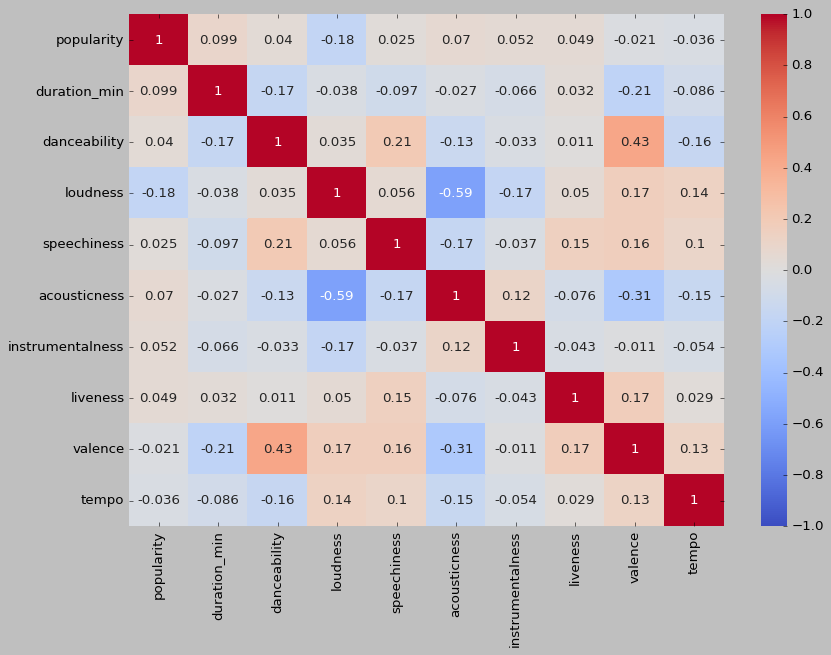

In [ ]:
country_corr = country_df[['popularity','duration_min','danceability','loudness','speechiness','acousticness', 'instrumentalness', 'liveness','valence','tempo']].corr()

plt.figure(figsize=(12,8))
#sns.heatmap(corr, cmap='YlGnBu', annot=True)
sns.heatmap(country_corr,
            vmin=-1, vmax=1, # set the color bar range to [-1, 1]
            cmap='coolwarm', # set the color scheme to 'coolwarm'
            annot=True) 

In [ ]:
popular_country_artists_mean = country_df.groupby(by=['artists'])['popularity'].mean().sort_values(ascending=False)
popular_country_artists_mean.head(10)

artists
Morgan Wallen                 83.333333
Chris Stapleton               81.000000
Luke Combs                    80.333333
Boston                        79.000000
Megan Moroney                 78.000000
Kane Brown;Katelyn Brown      78.000000
Walker Hayes                  77.000000
America;George Martin         76.000000
Kane Brown;Swae Lee;Khalid    75.000000
Johnny Cash                   74.000000
Name: popularity, dtype: float64

In [ ]:
# top 25 most popular pop songs
country_top25 = country_df.nlargest(n=25, columns=['popularity'])
country_top25.head(25)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
16903,5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,You Proof,86,157477,False,0.731,0.850,9,...,1,0.0336,0.25200,0.000000,0.6050,0.644,119.706,4,country,2.62
16631,40riOy7x9W7GXjyGp4pjAv,Eagles,Hotel California (2013 Remaster),Hotel California - 2013 Remaster,84,391376,False,0.579,0.508,2,...,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,4,country,6.52
17042,4686eQ81DEswHa90bcdlC9,Bailey Zimmerman,Rock and A Hard Place,Rock and A Hard Place,84,207540,False,0.582,0.568,1,...,1,0.0275,0.57700,0.000000,0.1050,0.394,121.991,3,country,3.46
16940,3cBsEDNhFI9E82vPj3kvi3,Morgan Wallen,Dangerous: The Double Album,Wasted On You,83,178520,False,0.505,0.657,11,...,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,3,country,2.98
16912,200x8ONbPfFzByUr3fVz46,Cole Swindell,Stereotype,She Had Me At Heads Carolina,82,206106,False,0.607,0.912,8,...,1,0.0611,0.12400,0.000000,0.3320,0.722,134.944,4,country,3.44
16945,28n8z9IQKyjMPxmvYMBqZa,Luke Combs,The Kind of Love We Make,The Kind of Love We Make,82,224426,False,0.608,0.745,1,...,1,0.0277,0.02260,0.000006,0.0942,0.464,102.025,4,country,3.74
16839,3fqwjXwUGN6vbzIwvyFMhx,Chris Stapleton,Traveller,Tennessee Whiskey,81,293293,False,0.392,0.370,9,...,1,0.0298,0.20500,0.009600,0.0821,0.512,48.718,4,country,4.89
17081,6foY66mWZN0pSRjZ408c00,Morgan Wallen,If I Know Me,Whiskey Glasses,81,234346,False,0.614,0.680,6,...,1,0.0289,0.36900,0.000002,0.1150,0.707,149.959,4,country,3.91
16873,2rxQMGVafnNaRaXlRMWPde,Luke Combs,This One's for You Too (Deluxe Edition),Beautiful Crazy,80,193200,False,0.551,0.402,11,...,1,0.0262,0.67600,0.000000,0.0928,0.382,103.313,4,country,3.22
16943,1QEEqeFIZktqIpPI4jSVSF,Boston,Boston,More Than a Feeling,79,285133,False,0.377,0.681,7,...,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4,country,4.75


In [ ]:
# bottom 25 most popular pop songs
country_bottom25 = country_df.nsmallest(n=25, columns=['popularity'])
country_bottom25.head(25)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
16582,6AHJTA1BN7ePfChCwqph3z,Luke Bryan,Country USA,Country On,0,236455,False,0.520,0.751,5,...,1,0.0551,0.17100,0.000007,0.0624,0.519,156.044,4,country,3.94
16589,3opqy7HYeNHQaUwYVS7cLo,Thomas Rhett;HARDY,Tailgate Country,Put It On Ice,0,184800,False,0.554,0.757,0,...,1,0.0355,0.01010,0.000000,0.0604,0.629,75.049,4,country,3.08
16592,3ph79KYuJ2bndNPA2c1tRH,Florida Georgia Line,Country USA,I Love My Country,0,185466,False,0.525,0.940,4,...,1,0.0650,0.02830,0.000000,0.2360,0.636,140.093,4,country,3.09
16595,6ZqH4uUlj3rArdFyaejq9n,Zach Bryan,Burn Burn Burn - Hot Country Hits,"Burn, Burn, Burn",0,268856,False,0.508,0.296,3,...,1,0.0755,0.89700,0.000050,0.1100,0.134,82.532,4,country,4.48
16596,754GZNuFfUJ0RVPjG8Gwaw,Luke Bryan,Artsy & Colourful,Rain Is A Good Thing,0,176160,False,0.622,0.931,11,...,0,0.0507,0.10600,0.000002,0.3280,0.521,108.051,4,country,2.94
16598,2wSZhX2Yvslh1oZFFjj45p,Florida Georgia Line,Tailgate Country,Sun Daze,0,185400,False,0.484,0.944,4,...,1,0.0413,0.09010,0.000000,0.4710,0.839,170.064,4,country,3.09
16600,6ndj9mwGI2t50WWLPwLzIM,Zach Bryan,Finest Country,Heavy Eyes,0,190780,False,0.471,0.912,5,...,1,0.0724,0.03200,0.000000,0.3430,0.613,139.667,4,country,3.18
16601,4nyN0a40cy71y5kWMLL6A2,Creedence Clearwater Revival,Twisted Halloween Hits,I Put A Spell On You,0,271786,False,0.393,0.732,4,...,0,0.0295,0.00471,0.123000,0.0979,0.621,100.410,4,country,4.53
16603,6Pt0FLZMQcycOm3BwToqQa,Creedence Clearwater Revival,Christmas time but not Christmas songs 2022,Fortunate Son,0,140773,False,0.640,0.663,0,...,1,0.0373,0.20100,0.008060,0.1520,0.665,132.768,4,country,2.35
16604,0BIpEYy15QaMusucc8H0l7,Creedence Clearwater Revival,Anthems for Witches 2022,Bad Moon Rising - Remastered 1985,0,139279,False,0.621,0.850,2,...,1,0.0311,0.02210,0.000002,0.0581,0.923,89.497,4,country,2.32


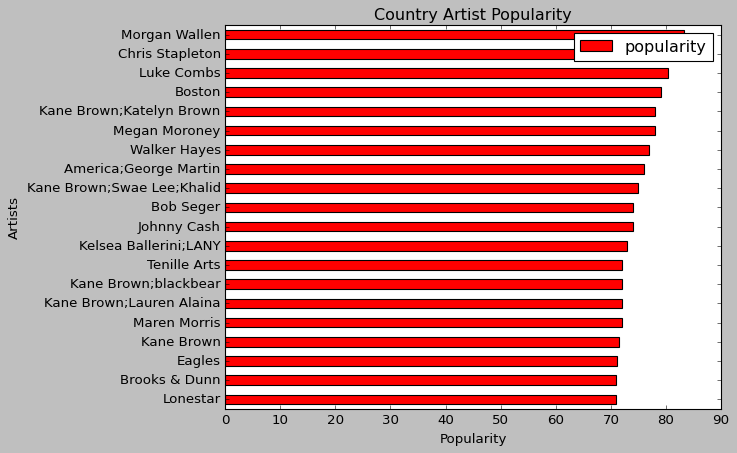

In [ ]:
grp_country = country_df.groupby('artists')
artists_country = grp_country[['popularity']].mean().sort_values(by=['popularity']).tail(20)
artists_country.plot.barh(color='red')
plt.title('Country Artist Popularity')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

In [ ]:
country_df.groupby(by=['track_genre','artists']).mean()[['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','tempo', 'valence','duration_min']].sort_values(by='popularity').tail(3)

popularity  danceability  energy   loudness  \
track_genre artists                                                        
country     Luke Combs        80.333333      0.548667   0.599  -5.585333   
            Chris Stapleton   81.000000      0.392000   0.370 -10.888000   
            Morgan Wallen     83.333333      0.616667   0.729  -4.911000   

                             speechiness  acousticness  instrumentalness  \
track_genre artists                                                        
country     Luke Combs          0.026400      0.296533          0.000002   
            Chris Stapleton     0.029800      0.205000          0.009600   
            Morgan Wallen       0.031433      0.331333          0.000357   

                                  tempo   valence  duration_min  
track_genre artists                                              
country     Luke Combs       119.100667  0.434000      3.613333  
            Chris Stapleton   48.718000  0.512000      4.890000  
            Morgan Wallen    155.221667  0.534333      3.170000

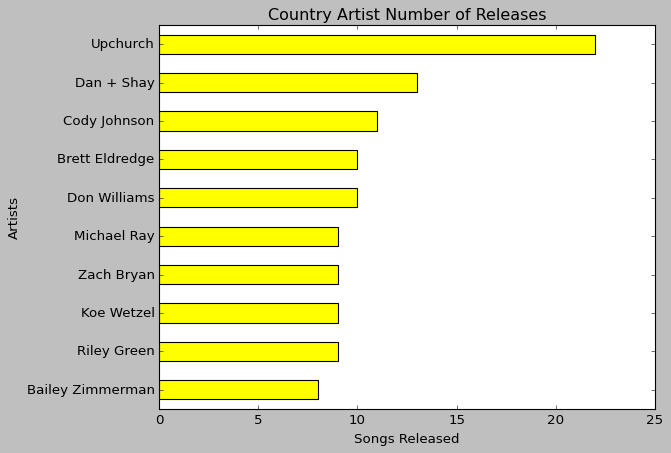

In [ ]:
#country_releases = country_top10['artists'].unique()

#top 10 country artists with most releases
country_art_releases = country_df['artists'].value_counts().sort_values().tail(10)
country_art_releases

country_art_releases.plot.barh(color='yellow')
plt.title('Country Artist Number of Releases')
plt.xlabel('Songs Released')
plt.ylabel('Artists')
plt.show()

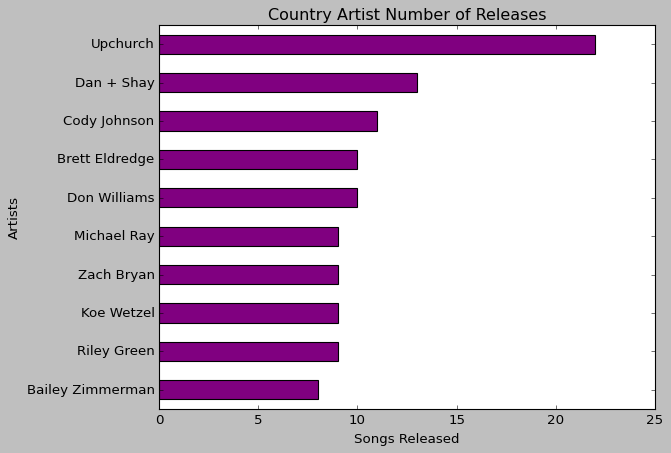

In [ ]:
country_releases = country_top25['artists'].unique()

#top 10 country artists with most releases
country_art_releases = country_df['artists'].value_counts().sort_values().tail(10)
country_art_releases

country_art_releases.plot.barh(color='purple')
plt.title('Country Artist Number of Releases')
plt.xlabel('Songs Released')
plt.ylabel('Artists')
plt.show()

In [ ]:
import pandas as pd
data = [['duration_min',3.8568062009785837, 3.4305438596491227, 2.99, 3.78], 
        ['danceability',0.5592770180226697, 0.5614508771929825, 0.487, 0.63875],
        ['energy',0.6350265044380519, 0.6207231578947368, 0.474, 0.789],
        ['key', 5.285891667281355, 5.487719298245614, 2.0, 9.0],
        ['loudness', -8.593824149885668, -7.174659649122807,-8.48475, -5.06925],
        ['mode', 0.6323424553121388, 0.8807017543859649,1.0, 1.0],
        ['speechiness', 0.08899327284797523, 0.04380877192982456, 0.0291, 0.046475],
        ['acousticness', 0.3296585739089278, 0.299409847368421, 0.05275, 0.483],
        ['instrumentalness', 0.18473542379521038,0.0035864526140350884, 0.0, 1.37e-05],
        ['liveness', 0.2197189792481129,0.17465649122807017,0.0998,0.2145],
        ['valence', 0.463275445169777, 0.5226908771929825,0.34724999999999995, 0.6992499999999999],
        ['tempo', 122.14565035283124, 124.09015964912281, 98.36125000000001, 147.0195]]

country_rec = pd.DataFrame(data, columns = ["Variable", "Average All Music", "Average Country", "Country Music Quartile 1", "Country Music Quartile 3"])
country_rec

,Variable,Average All Music,Average Country,Country Music Quartile 1,Country Music Quartile 3
0,duration_min,3.856806,3.430544,2.99000,3.780000
1,danceability,0.559277,0.561451,0.48700,0.638750
2,energy,0.635027,0.620723,0.47400,0.789000
3,key,5.285892,5.487719,2.00000,9.000000
4,loudness,-8.593824,-7.174660,-8.48475,-5.069250
5,mode,0.632342,0.880702,1.00000,1.000000
6,speechiness,0.088993,0.043809,0.02910,0.046475
7,acousticness,0.329659,0.299410,0.05275,0.483000
8,instrumentalness,0.184735,0.003586,0.00000,0.000014
9,liveness,0.219719,0.174656,0.09980,0.214500


Text(0.5, 1.0, 'Speechiness Country Top 25 Songs')

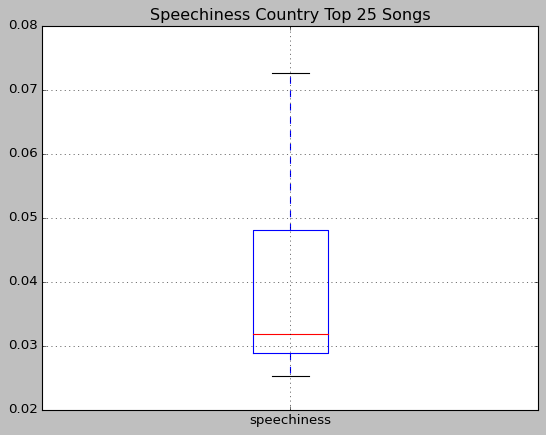

In [ ]:

boxes = country_top25.boxplot(column=['speechiness'])  
plt.title('Speechiness Country Top 25 Songs')

Text(0.5, 1.0, 'Liveness Country Top 25 Songs')

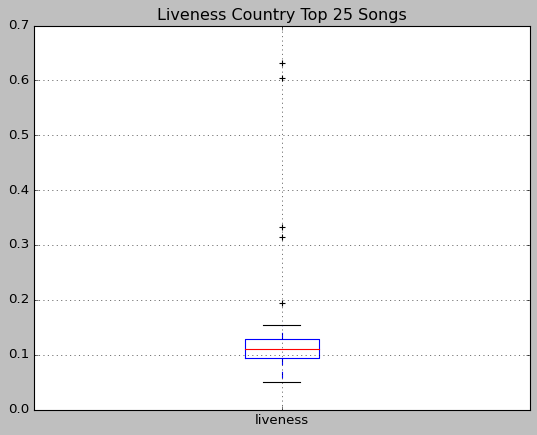

In [ ]:
boxed = country_top25.boxplot(column=['liveness'])  
plt.title('Liveness Country Top 25 Songs')

Text(0.5, 1.0, 'Acousticness Country Top 25 Songs')

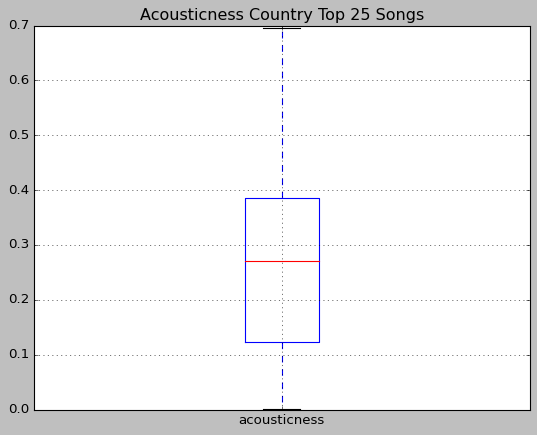

In [ ]:
plots = country_top25.boxplot(column=['acousticness'])  
plt.title('Acousticness Country Top 25 Songs')

# Conclusion




* Originally we thought that there would stronger correlation with variables and popularity
* Based on the correlation matrices, there appears to be no clear one variable that can be used to directly determine a song's popularity.
* Our recommendation to artists looking to create a popular song in a given genre is to utilize the averages of the genre and top artists collected to indicate what to aim for in the qualities of their songs
*We would also urge them to reflect on the most popular artists from their chosen genre, which can inform what is most important for a designated genre